# Confronto tra Insertion Sort e Counting Sort

## Scopo dell'esercizio.

Lo scopo di questo notebook Jupyter è quello di implementare gli algoritmi insertion sort e counting sort al fine di verificare la correttezza di ciò che abbiamo studiato nel corso di Algoritmi e Strutture Dati.

## Aspetti Teorici.

Quelli che andremo a confrontare sarabbo 2 algoritmi di ordinamento. Con algoritmo di ordinamento si indende quell'algoritmo che risolve il problema computazionale di ordinare un insiemed di dati secondo un particolare criterio. In questo caso noi ordineremo numeri interi all'interno di array provenienti dal modulo numpy.

### Insertion Sort
L'Inserion Sort è uno degli aglortimi di ordinamento più semplici, ma anche uno dei meno efficenti. Questo è un algoritmo per confronto, ovvero ordina gli elemnti mediante confronti tra coppio di valori. La strategia utilizzata è quella di creare per iterazioni successivi un sottoinsieme ordinato sempre più grande, partendo da un unsieme vuoto fino all'intero array. Questa strategia può essere rissunta con il suo invariante di ciclo: "Prima della i-esima iterazione gli elementi dell'array A[1, i] sono quelli presenti originariamente in quell'intervallo, ma ordinati". Quello che volgiamo verificare di questo algoritmo è che presenti i seguenti costi asintotici:

* **Caso migliore**: $\theta(n)$
* **Caso medio**: $O(n^2)$
* **Caso peggiore**: $O(n^2)$

### Counting Sort
Il Counting sort è un algoritmo di ordinamento che non sfruta una strategia di controntro tra elementi, e quindi non è affetto dalla limitazione di avere un costo nel caso peggiore di $\Omega(log(n)n)$. Questo algoritmo per ordinare gli elementi "conta" per ogni valore all'interno di un array quanti sono <= di quello, e grazie a questa informazione riesce a capire dove inserire l'elemento. Questo algoritmo però è limitato a poter ordinare solamente array di elementi naturali (oppure interi con leggere variazioni). Con queste premessi si ottiene che il costo asintotico di questo algoritmo è:
* **Qualsiasi caso**: $\theta(k + n)$
In questo caso con k si intende il numero più grande presente nell'array (oppure la differenza tra il massimo e il minimo in alcune implementazioni).

## Descrizione del codice

Nei seguenti blocchi si alterneranno tra codice e blocchi di testo, dove i secondi servono a dare delucidazioni sui primi.

### Algoritmi di Ordinamento.

Di seguito ci sono le implementazioni degli algoritmi precedentemente descritti, corredati da dei commenti che spiegano brevemente i significati degli argomenti che necessitano. Si è scelto di utilizzare gli array del modulo *numpy* per evitare che l'implementazione degli *array/liste* del Python potesse influire sull'effettiva esecuzione del codice.

Di seguito è presentato il codice dell'**Insertion Sort**. Questa si tratta di una implementazione abbastanza standard di questo algoritmo.

In [1]:
import numpy as np

def insertion_sort(A):
    """
    A è l'array che deve ordinare, non che anche l'oggetto in cui verrà salvato il
    risultato. 
    """
    length = A.size
    for j in range(1, length):
        key = A[j]
        i = j - 1
        while(i >= 0 and A[i] > key):
            A[i + 1] = A[i]
            i-= 1
        A[i + 1] = key



Invece quello che si trova qua sotto è il codice del **Counting Sort**. Possimao notare come questo algoritmo non si serva di confronti a coppie dei valori all'interno dell'array, come abbiamo specificato nella parte torica. Come descritto nei commenti è anche necessario passare un array in cui inserire i valori ordinati e k (ovvero il numero massimo all'interno dell'array). Sarebbe possibile individuare questo numero all'interno della funzione stessa, ma questa richiederebbe un costo aggiuntivo per questa ricerca che non sarebbe strettamente propria dell'algoritmo.

In [2]:
def counting_sort(A, B, k):
    """
    I parametri sono i seguenti:
     -A è l'array da ordinare
     -B è l'array in cui si inserirà il risultato
     -k numero massimo di presente nell'array A 
    """
    length = A.size
    C = np.zeros(k + 1, dtype = np.integer)
    for i in range(length):
        C[A[i]] += 1
    for i in range(k):
        C[i + 1] += C[i]
    for i in reversed(range(length)):
        B[C[A[i]] - 1] = A[i]
        C[A[i] ] -= 1

## Funzioni di Test

### Generazione di un Array Random
Questa funzione ci serve per generare un vettore di una determinata funzione che contenga valori casuali. Questa riceve anche un numero massimo che indica fino a che valore i numeri random possono essere generati. Successivamente è presente una istruzione che ci garantisce la presenza di almeno in una cella del massimo. Questo non sarebbe strettamente necessario, ma si è scelto di farlo proprio per evitare l'utilizzo del counting sort con grandezze sbagliate.

In [3]:
import numpy as np
import random


def random_array(length: int, max: int):
    """
    Questa funzione genera un array (provienente dal modulo numpy) con la lunghezza "length" fornita e 
    contenente come numero massimo "max".
    """
    if(length <= 0):
        raise ValueError("Errore! Impossibile usare un array di dimensione %d." % (length))
    array = np.zeros(length, dtype = np.integer)
    for i in range(length):
        array[i] = random.randint(0, max)
    
    array[random.randrange(0, length)] = max

    return array



## Parametri Utilizzati
In questa sezione sono definite tutte le variabili che verranno utilizzate per generare i vettori di test.

* **Length**: si riferisce alla lunghezza massima dell'array per cui vengono fatti i test.
* **Iter**: il numero di volte che vengono fatte le misurazioni.
* **Interval**: la distanza in numero di elementi tra una test e l'altro.
* **Max_1**: il numero massimo inserito all'interno degli array nel primo set di test.
* **Max_2**: il numero massimo inserito all'interno degli array nel secondo set di test.

In [4]:
"""
Dati che verranno utilizzati durante i test.
"""

length = 10000
iter = 30
interval = int(length / 100)
max_1 = 10
max_2 = 10000

La seguente funzione invece serve per generare un test, fornendogli il tipo di algortimo da usare ed il tipo di test. Oltre a questi dati si devono inserire altri valori: fino a quale valore bisogna eseguire i test, i valori massimi dentro questi array, il numero di volte per cui bisogna fare ogni volta i test e l'intervallo di distanza (in numero di ellemnti nell'array) tra un test e l'altro.
I risultati che questa funzione genera sono 2 liste: la prima indica il numero di elementi su cui vengono fatti i test, la seconda il tempi (medi) corrispondenti.

In [5]:
import math
from enum import IntEnum
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class algorithm_type(IntEnum):
    Insertion = 1
    Counting = 2

class test_type(IntEnum):
    Random = 1
    Order = 2
    Reverse = 3

def sorting_test(algo: algorithm_type, type: test_type, length: int, iter: int, interval: int, max: int):
    """
    Questa funzione permette di eseguire un particolare tipo di test su un particolare tipo di algoritmo di ordinamento.
    I parmatri utilizzati sono i seguenti:
    - algo: il tipo di algoritmo da testare.
    - type: il tipo di test da eseguire.
    - length: la lungezza massi che deve raggiunger l'array durante i test.
    - iter: il numero di volte che bisogna esguire le misurazioni su uno specifico test.
    - interval: la distanza in numero di elementi tra un test e l'altro.
    - max: il numero massimo presente all'interno dell'array.
    """
    
    if(length <= 0):
        raise ValueError("Errore! Impossibile usare un array di dimensione %d." % (length))
    times = []
    dimensions = list(range(length - interval * math.floor(length / interval), length + 1, interval))
    dimensions.remove(0)
    for i in dimensions:
        time = 0
        for j in range(iter):
            argument = []
            if(type == test_type.Random):
                argument = random_array(length, max)
            elif(type == test_type.Order):
                argument = [math.floor(max * (i / length))  for i in range(1, length + 1)]
            elif(type == test_type.Reverse):
                argument = [math.floor(max * (i / length))  for i in range(length, 0, -1)]
            if(algo == algorithm_type.Counting):
                B = np.zeros(length)
                start = timer()
                counting_sort(argument, B, max)
                end = timer()
            elif(algo == algorithm_type.Insertion):
                start = timer()
                insertion_sort(argument)
                end = timer()
            time += (end - start)
        times.append(time / iter)
    
    return dimensions, times

## Esecuzione dei test
I segunti blocchi di codice generano i risultati dei vari test ritenuti significativi per comprendere il tempo di esecuzione di questi algoritmi.

/tmp/ipykernel_3267/2283692762.py:12: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  array = np.zeros(length, dtype = np.integer)
/tmp/ipykernel_3267/1488679872.py:9: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  C = np.zeros(k + 1, dtype = np.integer)


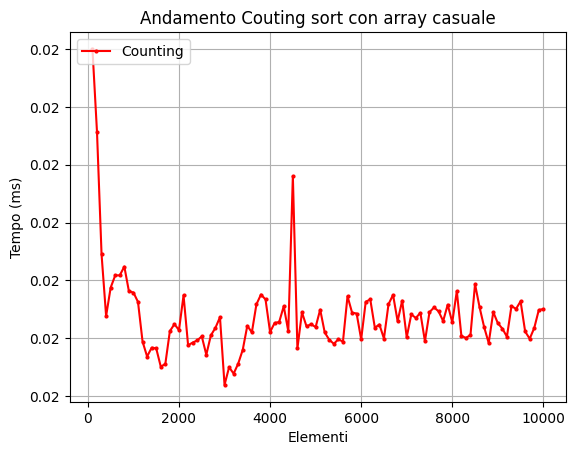

In [6]:
from Funzioni_per_Grafici import *

x_counting, y_counting = sorting_test(algorithm_type.Counting, test_type.Random, length, iter, interval, max_1)
create_function_plot(x_counting, y_counting, "Andamento Couting sort con array casuale", "Counting", "red", False, annotate = False, isLog = False, x_name = "Elementi")

#x_insertion, y_insertion = sorting_test(algorithm_type.Insertion, test_type.Random, length, iter, interval, max_1)
#create_function_plot(x_insertion, y_insertion, "Andamento Insertion Sort con array casuale", "Insertion", "green", False, annotate = False, isLog = False, x_name = "Elementi")
"""
x_values = [
    x_counting,
    x_insertion,
]

y_values = [
    [y_counting, "Counting", "red"],
    [y_insertion, "Insertion", "green"],
]
"""
#create_multiple_function_plot(x_values, y_values, "Confronto tra algoritmi di ordinamento.", False, isLog = False, x_name = "Elementi")
plt.show()

In [7]:
l = 1000
m = 1000

start = timer()
array = random_array(l, m)
end = timer()
print(end - start)

start = timer()
sorted(array)
end = timer()
print(end - start)

B = np.zeros(l)
start = timer()
counting_sort(array, B, m)
end = timer()
print(end - start)

start = timer()
insertion_sort(array)
end = timer()
print(end - start)



0.007054151000147613
0.0007390550001673546
0.004201628000146229
0.1338373710000269


/tmp/ipykernel_3267/2283692762.py:12: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  array = np.zeros(length, dtype = np.integer)
/tmp/ipykernel_3267/1488679872.py:9: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  C = np.zeros(k + 1, dtype = np.integer)
